In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../data/raw/nvda_daily.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

# DataFrame Overview

In [3]:
print(df.shape)
print(df.head())
print(df.tail())

(2313, 7)
        Date     Open     High      Low    Close  Adj Close      Volume
0 2016-05-13  0.97975  1.02500  0.97500  1.02450   1.003362  2110256000
1 2016-05-16  1.01675  1.07000  1.01350  1.05475   1.032988   973032000
2 2016-05-17  1.05000  1.06450  1.03650  1.05700   1.035192   628392000
3 2016-05-18  1.05000  1.09625  1.05000  1.08400   1.061635   541072000
4 2016-05-19  1.07975  1.09650  1.07825  1.08875   1.066286   398880000
           Date        Open        High         Low       Close   Adj Close  \
2308 2025-07-21  172.750000  173.380005  171.000000  171.380005  171.380005   
2309 2025-07-22  171.339996  171.389999  164.580002  167.029999  167.029999   
2310 2025-07-23  169.529999  171.259995  167.970001  170.779999  170.779999   
2311 2025-07-24  172.440002  173.830002  171.300003  173.740005  173.740005   
2312 2025-07-25  173.610001  174.720001  172.960007  173.500000  173.500000   

         Volume  
2308  123126100  
2309  193114300  
2310  154082200  
2311  12898

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

print(f"Duplicate rows: {df.duplicated().sum()}")

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Duplicate rows: 0


# Summary statistics

In [5]:
print(df.describe())

                                Date         Open         High          Low  \
count                           2313  2313.000000  2313.000000  2313.000000   
mean   2020-12-16 10:20:04.669260800    30.500090    31.048804    29.898938   
min              2016-05-13 00:00:00     0.979750     1.025000     0.975000   
25%              2018-08-29 00:00:00     4.738750     4.791250     4.640500   
50%              2020-12-15 00:00:00    13.070000    13.315000    12.885000   
75%              2023-04-04 00:00:00    29.759001    30.468000    28.832001   
max              2025-07-25 00:00:00   173.639999   174.720001   172.960007   
std                              NaN    41.794778    42.499442    40.972119   

             Close    Adj Close        Volume  
count  2313.000000  2313.000000  2.313000e+03  
mean     30.503756    30.469805  4.755996e+08  
min       1.024500     1.003362  9.788400e+07  
25%       4.715500     4.677888  3.088800e+08  
50%      13.062250    13.023232  4.275020e+08  


# Plot closing price over time

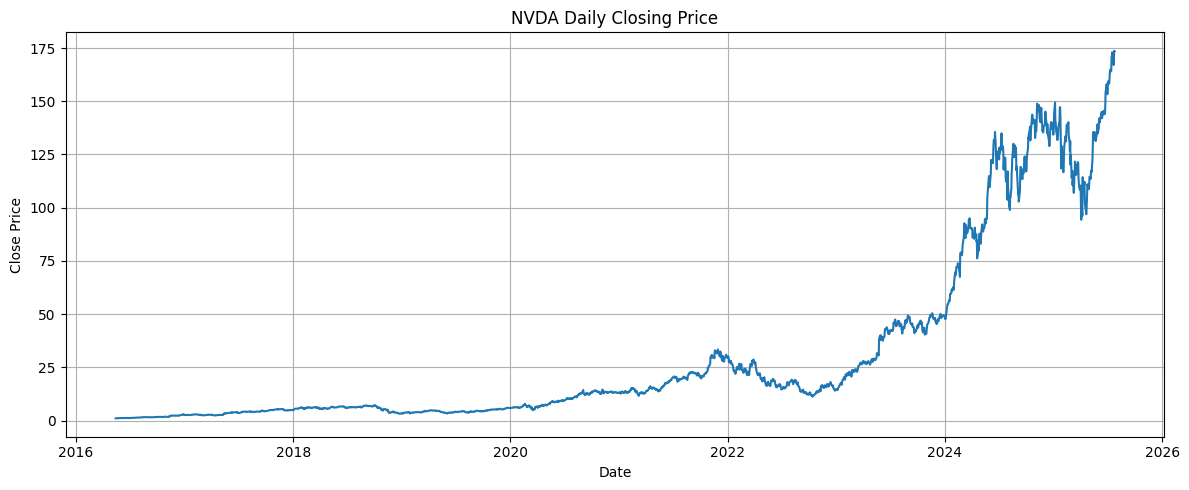

In [6]:
import matplotlib.dates as mdates

# Clean up
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

df = df[df["Close"] > 1]  # Remove very low/zero prices
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"])

plt.title("NVDA Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

Plot daily volume

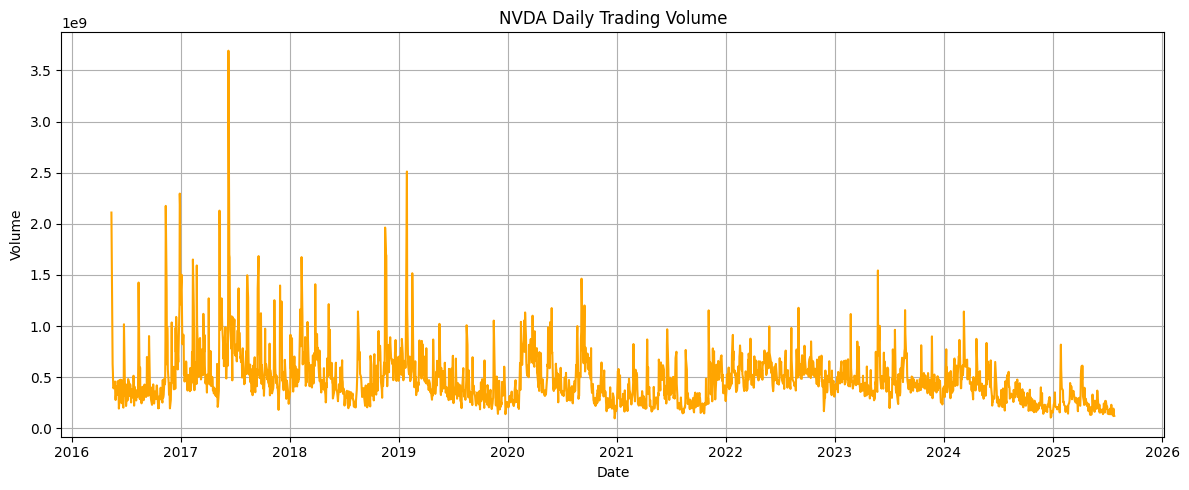

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Volume"], color="orange")
plt.title("NVDA Daily Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot return distribution

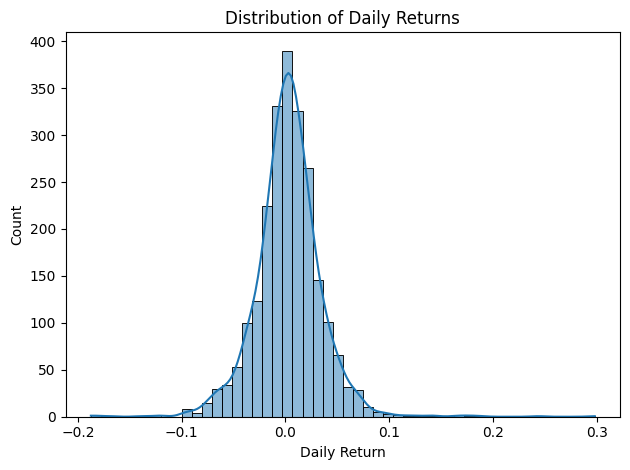

In [8]:
df["Daily Return"] = df["Close"].pct_change()
sns.histplot(df["Daily Return"].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.tight_layout()
plt.show()

# Correlation Analysis

<Axes: >

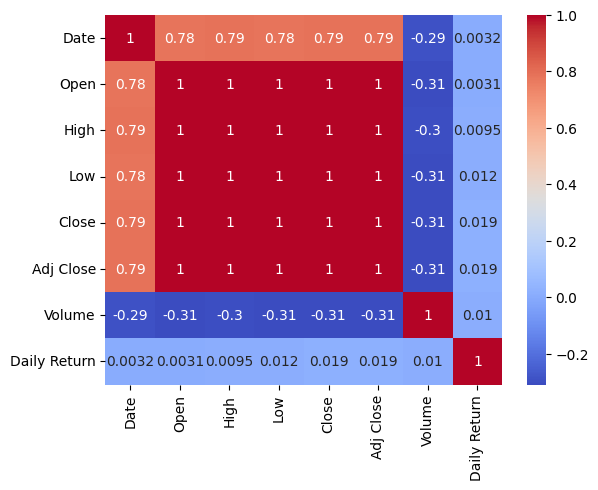

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Plot Daily Return with Outliers Highlighted

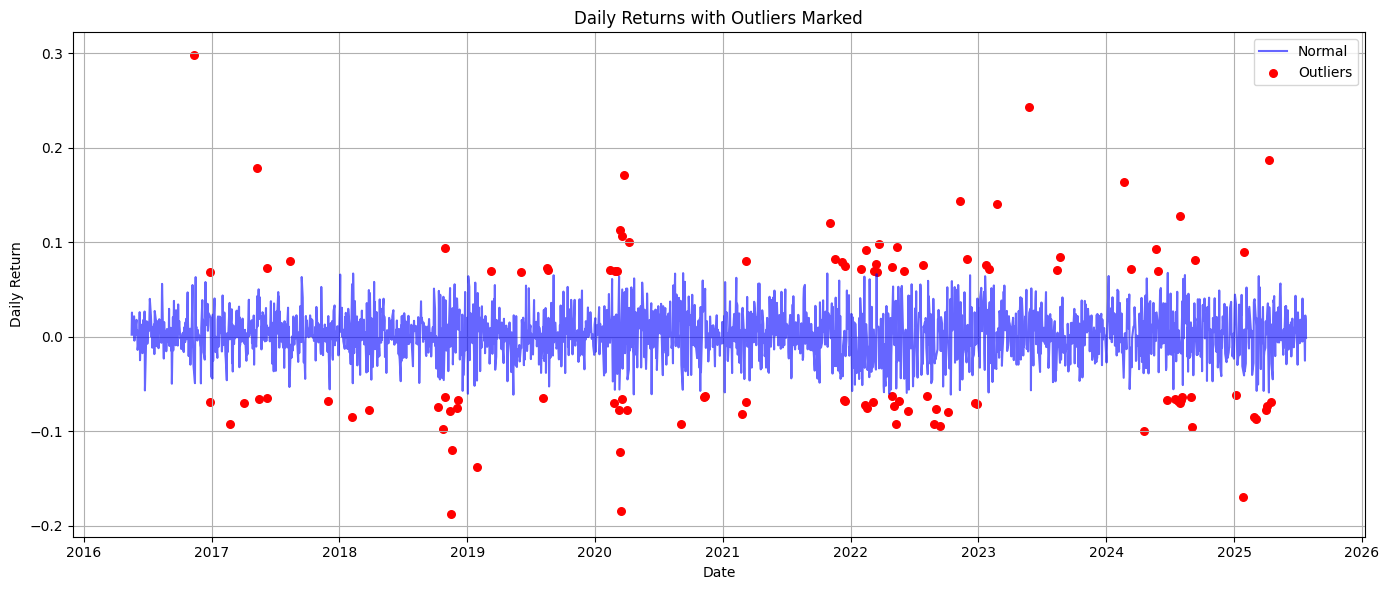

In [10]:
# Make sure Daily Return is available
df["Daily Return"] = df["Close"].pct_change()
df = df.dropna()

# Calculate IQR for outlier detection
Q1 = df["Daily Return"].quantile(0.25)
Q3 = df["Daily Return"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Separate normal and outlier points
normal_points = df[(df["Daily Return"] >= lower_bound) & (df["Daily Return"] <= upper_bound)]
outlier_points = df[(df["Daily Return"] < lower_bound) | (df["Daily Return"] > upper_bound)]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(normal_points["Date"], normal_points["Daily Return"], label="Normal", color="blue", alpha=0.6)
plt.scatter(outlier_points["Date"], outlier_points["Daily Return"], label="Outliers", color="red", s=30)
plt.title("Daily Returns with Outliers Marked")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
print(f"Number of outliers: {len(outlier_points)}")

Number of outliers: 110


In [12]:
print(outlier_points[["Date", "Daily Return"]].sort_values("Daily Return"))

           Date  Daily Return
634  2018-11-16     -0.187559
965  2020-03-16     -0.184521
2188 2025-01-27     -0.169682
680  2019-01-28     -0.138245
963  2020-03-12     -0.122368
...         ...           ...
971  2020-03-24      0.171564
249  2017-05-10      0.178259
2239 2025-04-09      0.187227
1770 2023-05-25      0.243696
127  2016-11-11      0.298067

[110 rows x 2 columns]
